# Plot epsilon's effect on privacy (attacker's perspective)
By [Armaan Bhojwani](https://armaanb.net) under [Praneeth Vepakomma](https://praneeth.mit.edu/)

Inspired by https://desfontain.es/privacy/differential-privacy-in-more-detail.html, see link for further explanation.

### Dependencies
- seaborn

### Status
- Complete

### Parameters

In [1]:
max_epsilon = 4     # Maximum epsilon value to plot
epsilon_step = 0.5  # Step size between epsilons

# See http://seaborn.pydata.org/tutorial/color_palettes.html
color_palette = "Blues"

### Code

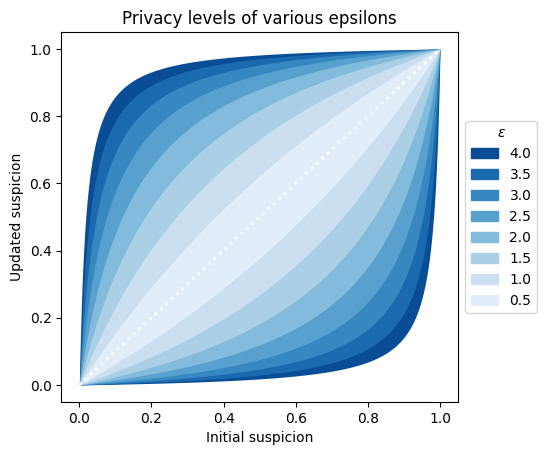

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import math

# Parameters
x_resolution = 500
e = math.e

# Color palette
num_values = int(max_epsilon / epsilon_step)
colors = sns.color_palette(color_palette, num_values)

x = np.linspace(0, 1, x_resolution)

# Setup plot
fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()

for i in range(num_values, 0, -1):
    epsilon = i * epsilon_step
    
    # Lower bound
    y1 = x / ((e**epsilon) + (1 - (e**epsilon)) * x)

    # Upper bound
    y2 = (e**epsilon * x) / (1 + (e**epsilon - 1) * x)

    # Plot bounds
    color = colors[i - 1]
    ax.fill_between(x, y1, y2, linewidth=0, color=color)

    # Add legend
    handles.append(mpatches.Patch(color=color, label=epsilon))

# Plot x = y line
ax.plot(x, x, linewidth=2, color='w', linestyle="dotted")

# Plot legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(handles=handles,
          loc='center left',
          bbox_to_anchor=(1, 0.5),
          title=r'$\epsilon$')

# Set axes
ax.set_xlabel("Initial suspicion")
ax.set_ylabel("Updated suspicion")
plt.title("Privacy levels of various epsilons")

plt.show()